# Your turn to try out Linear Regression with Test/Train Split & Regularization

If you get stuck at any step, please ask others or ask me!

Execute the following cell to import our libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

We'll use a dataset from Scikit-Learn:  [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [2]:
# Execute this to import the data,
# print a description
# and initialize the Pandas dataframe "ca_housing_df"

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

ca_housing_df = california_housing.frame

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Use the cell below to look at some sample rows of the `ca_housing_df` dataframe:

In [3]:
ca_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Use the `info` method to look at the number of rows & columns, and see whether there are any null values:

In [4]:
ca_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Make simple histogram plots of all variables (e.g. with `ca_housing_df.hist()`).
* Are they normally distributed? Bi-modal?  mostly normal with a couple outliers?  uniformly distributed with obvious caps to the allowable range of values?
* If you'd like, tinker with the number of bins for the histogram, zoom in on the ranges, etc
* You may also find it useful to change the figure size (e.g. `figsize=(12, 10)` as an input parameter to `hist`) or use `plt.tight_layout()` after the plotting command to keep multiple plots from overlapping

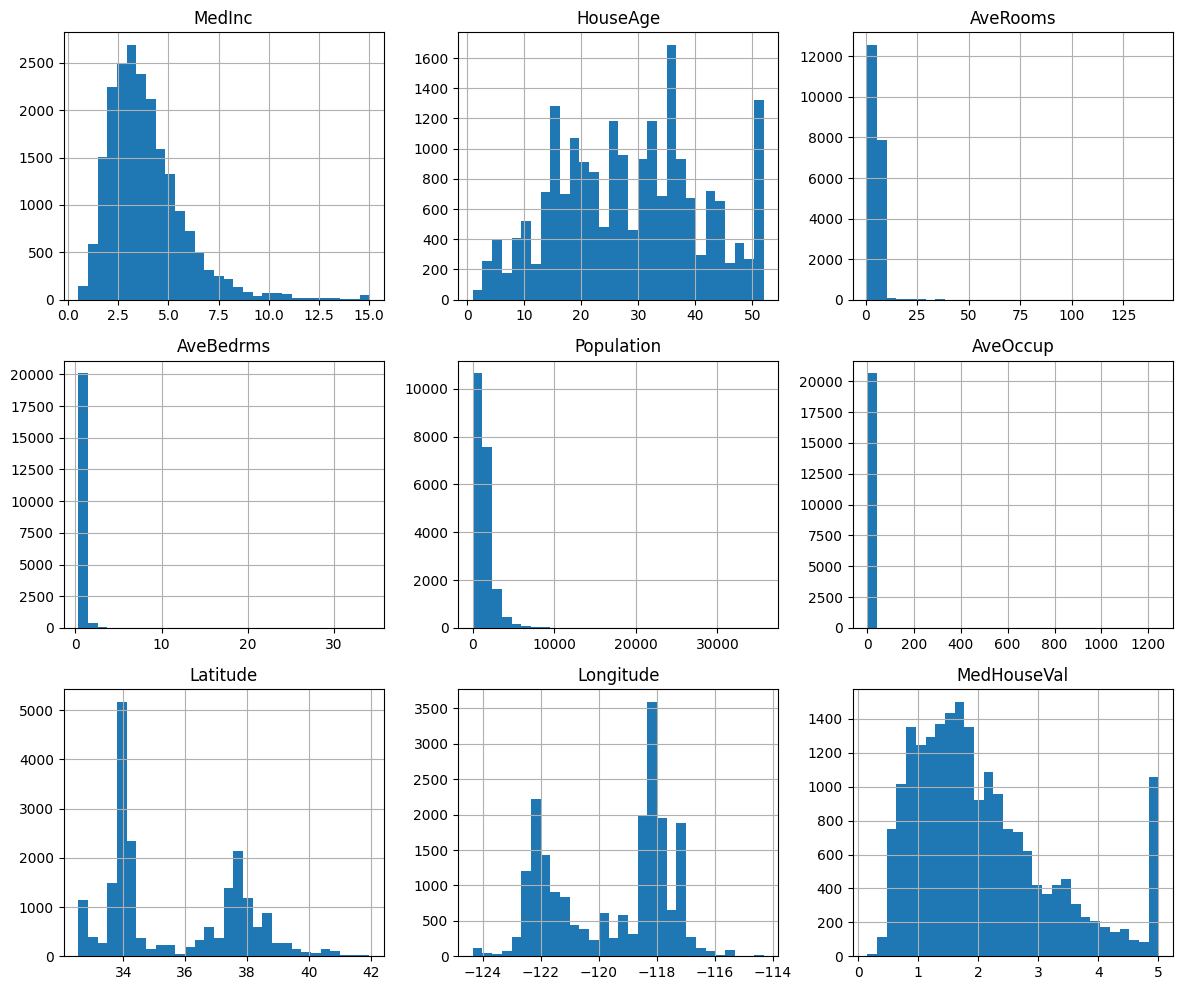

In [5]:
ca_housing_df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()

You can get a matrix of correlation coefficients by using the dataframe's `corr()` method.
* Check that out in the cell below
* Which variables are most correlated with the target variable of `MedHouseVal`?
* Which pairs of variables are highly correlated with each other?

In [6]:
ca_housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [7]:
import seaborn as sns

<Axes: >

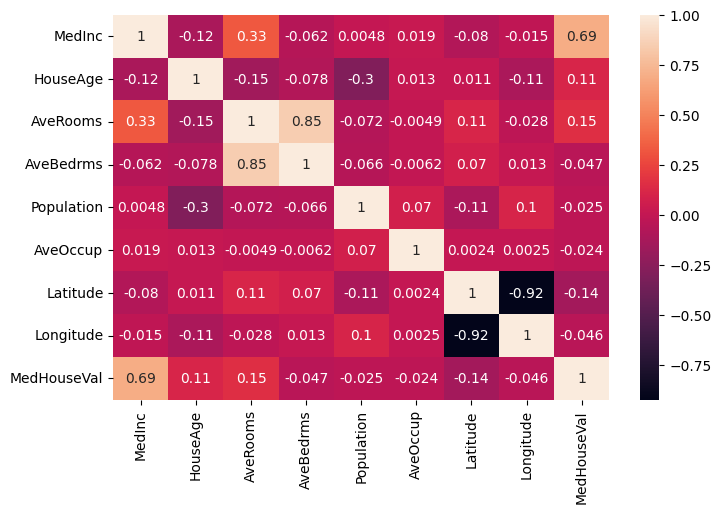

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(ca_housing_df.corr(), annot=True)

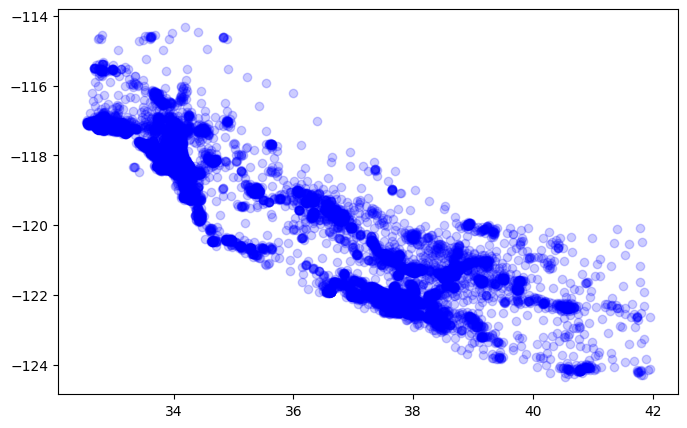

In [9]:
plt.figure(figsize=(8,5))
plt.plot(ca_housing_df['Latitude'], ca_housing_df['Longitude'], 'bo', alpha=0.2)

Use `train_test_split` to make a training set and test set, where `MedHouseVal` is your target variable and all other variables are your feature variables.
* You can use `california_housing.data` and `california_housing.target` to get your features and target, or you can use `ca_housing_df.loc[:, ca_housing_df.columns != 'MedHouseVal']` and `ca_housing_df.loc[:, 'MedHouseVal']`  (or other options too)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, 
                                                    california_housing.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

In the next cell:
* train `Linear_Regression` on your training set
* assess the learned model's performance on the test data using `mean_squared_error`
* make a plot of the coefficient amplitudes
  * the coefficient values are stored in the `coef_` attribute of the variable for your `LinearRegression` object

In [11]:
# Linear Regression without regularization

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

print("Linear Regression (No Regularization) - Coefficients:")
print(model_lr.coef_)

y_pred1 = model_lr.predict(X_test)

print('MSE_lr = %.2f' % mean_squared_error(y_test, y_pred1))

Linear Regression (No Regularization) - Coefficients:
[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
MSE_lr = 0.56


<BarContainer object of 8 artists>

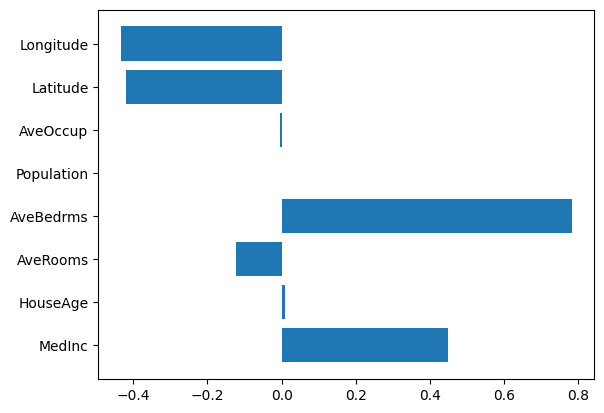

In [12]:
plt.barh(california_housing.feature_names, model_lr.coef_)

Do the same thing, only now use Ridge regularization by using `Ridge(alpha=1000)`.

In [13]:
# Ridge Regression (L2 regularization)

alpha_ridge = 1000  # Regularization strength for L2
model_ridge = Ridge(alpha=alpha_ridge)

model_ridge.fit(X_train, y_train)

print(f"Ridge Regression (L2 Regularization, alpha={alpha_ridge}) - Coefficients:")
print(model_ridge.coef_)

y_pred1 = model_ridge.predict(X_test)

print('MSE_ridge = %.2f' % mean_squared_error(y_test, y_pred1))

Ridge Regression (L2 Regularization, alpha=1000) - Coefficients:
[ 4.00508705e-01  1.10993594e-02 -3.02437173e-02  2.41663687e-01
  2.15610668e-06 -3.48144901e-03 -3.67788890e-01 -3.71818461e-01]
MSE_ridge = 0.55


<BarContainer object of 8 artists>

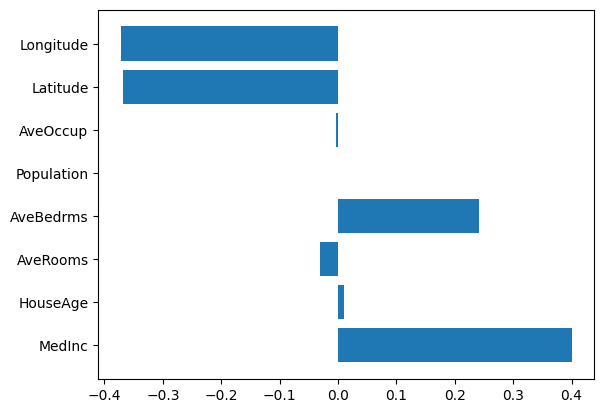

In [14]:
plt.barh(california_housing.feature_names, model_ridge.coef_)

<Axes: >

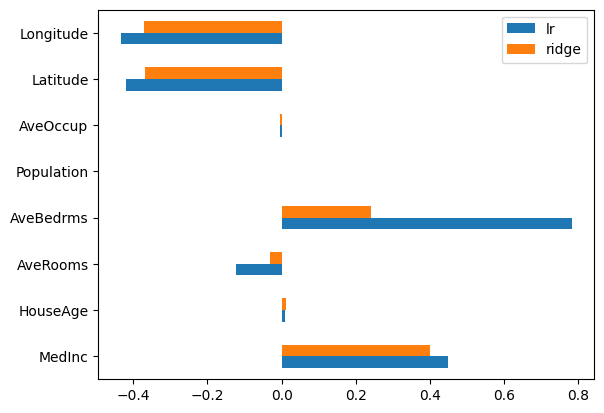

In [15]:
a = {'lr':model_lr.coef_, 
     'ridge':model_ridge.coef_}
adf = pd.DataFrame(a, index=california_housing.feature_names)
adf.plot(kind='barh')

Repeat again using Lasso with `Lasso(alpha=0.05)`

In [16]:
# Lasso Regression (L1 regularization)

alpha_lasso = 0.05  # Regularization strength for L1
model_lasso = Lasso(alpha=alpha_lasso)

model_lasso.fit(X_train, y_train)

print(f"Lasso Regression (L1 Regularization, alpha={alpha_lasso}) - Coefficients:")
print(model_lasso.coef_)

y_pred1 = model_lasso.predict(X_test)

print('MSE_lasso = %.2f' % mean_squared_error(y_test, y_pred1))

Lasso Regression (L1 Regularization, alpha=0.05) - Coefficients:
[ 3.87125541e-01  1.23155627e-02  0.00000000e+00  0.00000000e+00
  5.15103807e-06 -3.21516389e-03 -2.77627860e-01 -2.73861478e-01]
MSE_lasso = 0.56


<Axes: >

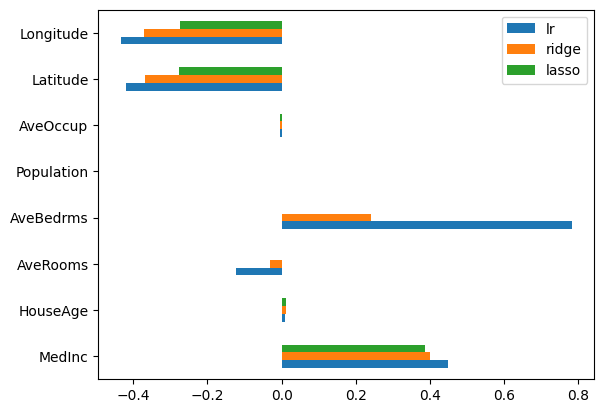

In [17]:
a = {'lr':model_lr.coef_, 
     'ridge':model_ridge.coef_, 
     'lasso':model_lasso.coef_}
adf = pd.DataFrame(a, index=california_housing.feature_names)
adf.plot(kind='barh')

Check the following:
* Is it easy to see differences in coefficient amplitudes on the same plot?  between the separate plots?
* Does Ridge reduce the coefficient amplitudes?
* Does Lasso reduce the coefficient amplitudes?
* What is the difference in coefficients resulting from Lasso vs Ridge?
* Look at the pairs of variables that you previously identified as being highly correlated with each other -- has regularization had more of an effect on the coefficient amplitude of one variable from your pair than the other?

If you get this far, try some of the following:
* Try out Elastic Net with `ElasticNet(alpha=0.05)` and compare
* Scaling of feature values can be useful for machine learning.
  * Look up Scikit-Learn's `StandardScaler`
  * Use this to scale your feature variables
  * Repeat one of the above ML trainings and look at what effect it has on the coefficients
* Make a bar plot that compares coefficient amplitudes for all your models
* Use cross-validation to find an optimum `alpha` value among some set of possible `alpha` values for one of your regularization models

## ElasticNet

In [18]:
# ElasticNet (Combo L1 and L2 regularization)

alpha_el = 0.05
model_el = ElasticNet(alpha=alpha_el, l1_ratio=0.5)

model_el.fit(X_train, y_train)

print(f"ElasticNet Regression (L1+L2 Regularization, alpha={alpha_el}) - Coefficients:")
print(model_el.coef_)

y_pred1 = model_el.predict(X_test)

print('MSE_lasso = %.2f' % mean_squared_error(y_test, y_pred1))

ElasticNet Regression (L1+L2 Regularization, alpha=0.05) - Coefficients:
[ 3.85132547e-01  1.15059296e-02  4.05103073e-05  2.49653723e-02
  2.43167414e-06 -3.29930691e-03 -3.34703888e-01 -3.34702631e-01]
MSE_lasso = 0.55


<Axes: >

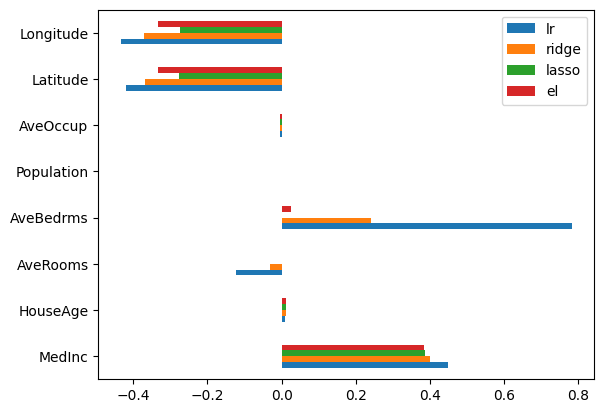

In [19]:
a = {'lr':model_lr.coef_, 
     'ridge':model_ridge.coef_, 
     'lasso':model_lasso.coef_,
     'el':model_el.coef_}
adf = pd.DataFrame(a, index=california_housing.feature_names)
adf.plot(kind='barh')

## Scaling

In [20]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.set_output(transform='pandas')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [22]:
X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551
...,...,...,...,...,...,...,...,...
11284,1.307215,0.507194,0.290620,-0.393391,-0.675847,-0.005588,-0.872016,0.808883
11964,-0.436266,0.348490,0.600411,0.398898,0.287195,0.069722,-0.759688,1.073144
5390,-0.496973,0.586545,-0.606759,-0.039216,0.289833,0.020306,-0.755007,0.599469
860,0.965450,-1.079841,0.402175,-0.066265,0.308303,0.007076,0.906510,-1.185540


In [23]:
X_train.mean()

MedInc           3.880754
HouseAge        28.608285
AveRooms         5.435235
AveBedrms        1.096685
Population    1426.453004
AveOccup         3.096961
Latitude        35.643149
Longitude     -119.582290
dtype: float64

In [24]:
X_train_scaled.mean()

MedInc       -6.519333e-17
HouseAge     -9.251859e-18
AveRooms     -1.981081e-16
AveBedrms    -1.707291e-16
Population   -2.151595e-19
AveOccup      4.936566e-17
Latitude      6.400995e-17
Longitude     1.753335e-15
dtype: float64

In [25]:
# Linear Regression without regularization
# now with the scaled feature variables
model_lr_scaled = LinearRegression()
model_lr_scaled.fit(X_train_scaled, y_train)
print("Linear Regression (No Regularization) with Scaled Features - Coefficients:")
print(model_lr_scaled.coef_)
y_pred1 = model_lr.predict(X_test_scaled)
print('MSE_lr_scaled = %.2f' % mean_squared_error(y_test, y_pred1))

Linear Regression (No Regularization) with Scaled Features - Coefficients:
[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
MSE_lr_scaled = 1529.76


<Axes: >

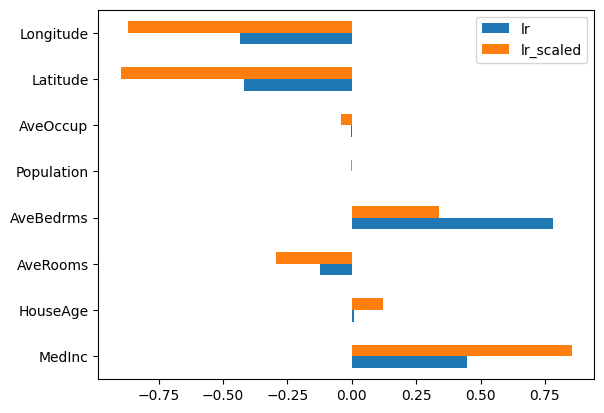

In [26]:
a = {'lr':model_lr.coef_, 
     'lr_scaled':model_lr_scaled.coef_}
adf = pd.DataFrame(a, index=california_housing.feature_names)
adf.plot(kind='barh')

## Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score

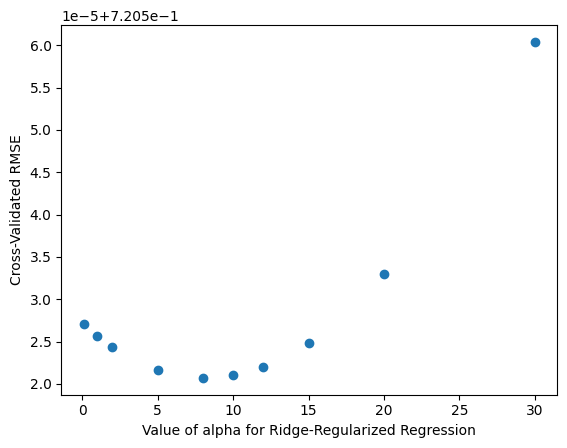

In [28]:
a_range = [0.1, 1, 2, 5, 8, 10, 12, 15, 20, 30]
a_scores = []
for a in a_range:
    rmodel = Ridge(alpha = a)
    loss = cross_val_score(rmodel,
                           X_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    a_scores.append(np.sqrt(-loss).mean())
plt.scatter(a_range, a_scores)
plt.xlabel('Value of alpha for Ridge-Regularized Regression')
plt.ylabel('Cross-Validated RMSE')
plt.show()

In [29]:
a_range[a_scores.index(min(a_scores))]

8

In [30]:
from sklearn.metrics import r2_score

In [31]:
rmodel_best = Ridge(alpha = 8)
rmodel_best.fit(X_train, y_train)
y_pred1 = rmodel_best.predict(X_test)
print('R2_ridge_best = %.2f' % r2_score(y_test, y_pred1))

R2_ridge_best = 0.58


What happens if the feature variables are scaled?

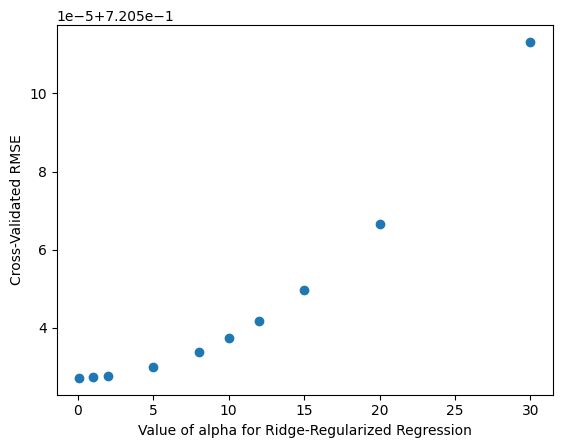

In [32]:
a_range = [0.1, 1, 2, 5, 8, 10, 12, 15, 20, 30]
a_scores = []
for a in a_range:
    rmodel = Ridge(alpha = a)
    loss = cross_val_score(rmodel,
                           X_train_scaled,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    a_scores.append(np.sqrt(-loss).mean())
plt.scatter(a_range, a_scores)
plt.xlabel('Value of alpha for Ridge-Regularized Regression')
plt.ylabel('Cross-Validated RMSE')
plt.show()

In [33]:
a_range[a_scores.index(min(a_scores))]

0.1

In [34]:
rmodel_best = Ridge(alpha = 0.1)
rmodel_best.fit(X_train_scaled, y_train)
y_pred1 = rmodel_best.predict(X_test_scaled)
print('R2_ridge_best = %.2f' % r2_score(y_test, y_pred1))

R2_ridge_best = 0.58


To be continued....